**Exercise 4.7.9 (Computer Experiment)**.  Let $X_1, \dots, X_n$ be $N(0, 1)$ random variables and let $\overline{X}_n = n^{-1} \sum_{i=1}^n X_i$.  Plot $\overline{X}_n$ versus $n$ for $n = 1, \dots, 10,000$.  Repeat for $X_1, \dots, X_n \sim \text{Cauchy}$.  Explain why there is such a difference.

In [1]:
import numpy as np
from scipy.stats import norm, cauchy

np.random.seed(0)

N=10000
X=norm.rvs(size=N)
Y=cauchy.rvs(size=N)

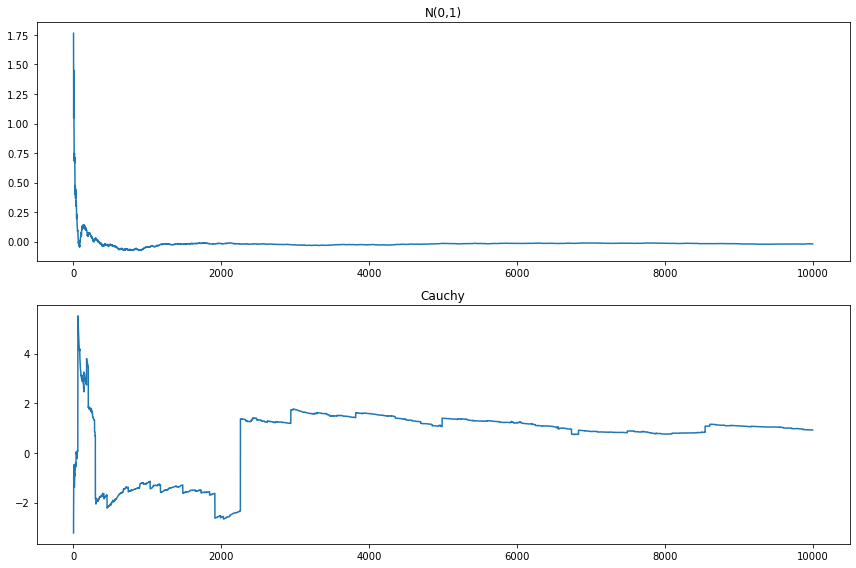

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

nn=np.arange(1,N+1)

plt.figure(figsize=(12,8))

ax=plt.subplot(2,1,1)
ax.plot(nn,np.cumsum(X)/nn)
ax.set_title('N(0,1)')
ax.set_xlabel=('n')
ax.set_ylabel=(r'$\overline{X}_n$')

ax=plt.subplot(2,1,2)
ax.plot(nn,np.cumsum(Y)/nn)
ax.set_title('Cauchy')
ax.set_xlabel=('n')
ax.set_ylabel=(r'$\overline{X}_n$')

plt.tight_layout()
plt.show()

**Exercise 4.7.11  (Computer Experiment: Simulating the Stock Market)**.  Let $Y_1, Y_2, \dots$ be independent random variables such that $\mathbb{P}(Y_i = 1) = \mathbb{P}(Y_i = -1) = 1/2$.  Let $X_n = \sum_{i=1}^n Y_i$.  Think of $Y_i = 1$ as "the stock price increased by one dollar" $Y_i = -1$ as "the stock price decreased by one dollar" and $X_n$ as the value of the stock on day $n$.

**(a)**  Find $\mathbb{E}(X_n)$ and $\mathbb{V}(X_n)$.

**(b)**  Simulate $X_n$ and plot $X_n$ versus $n$ for $n = 1, 2, \dots, 10,000$.  Repeat the whole simulation several times.  Notice two things.  First, it's easy to "see" patterns in the sequence even though it is random.  Second, you will find that the runs look very different even though they were generated the same way.  How do the calculations in (a) explain the second observation?

In [37]:
import numpy as np
from scipy.stats import norm, bernoulli

N=10000
B=20

Y=2*bernoulli.rvs(p=1/2,loc=0,size=(B,N),random_state=0)-1
X=np.cumsum(Y,axis=1)
X_u=np.percentile(X, 95, axis=0)
X_d=np.percentile(X, 5, axis=0)

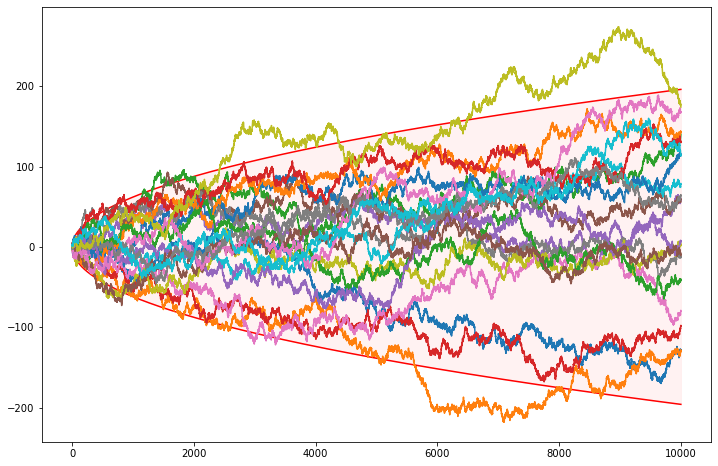

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

nn=np.arange(1,N+1)

z=norm.ppf(0.975)
plt.plot(nn,z*np.sqrt(nn),color='red')
plt.plot(nn,-z*np.sqrt(nn),color='red')
plt.fill_between(nn,z*np.sqrt(nn),-z*np.sqrt(nn),color='red',alpha=0.05)

for b in range(B):
    plt.plot(nn,X[b,])

plt.show()

**Exercise 4.17.19**.  This question is to help you understand the idea of **sampling distribution**.  Let $X_1, \dots, X_n$ be IID with mean $\mu$ and variance $\sigma^2$.  Let $\overline{X}_n  = n^{-1}\sum_{i=1}^n X_i$.  Then $\overline{X}_n$ is a **statistic**, that is, a function of the data.  Since $\overline{X}_n$ is a random variable, it has a distribution.  This distribution is called the *sampling distribution of the statistic*.  Recall from Theorem 4.16 that $\mathbb{E}(\overline{X}_n) = \mu$ and $\mathbb{V}(\overline{X}_n) = \sigma^2 / n$.  Don't confuse the distribution of the data $f_X$ and the distribution of the statistic $f_{\overline{X}_n}$.  To make this clear, let $X_1, \dots, X_n \sim \text{Uniform}(0, 1)$.  Let $f_X$ be the density of the $\text{Uniform}(0, 1)$.  Plot $f_X$.  Now let $\overline{X}_n = n^{-1} \sum_{i=1}^n X_i$.  Find $\mathbb{E}(\overline{X}_n)$ and $\mathbb{V}(\overline{X}_n)$.  Plot them as a function of $n$.  Comment.  Now simulate the distribution of $\overline{X}_n$ for $n = 1, 5, 25, 100$.  Check the simulated values of $\mathbb{E}(\overline{X}_n)$ and $\mathbb{V}(\overline{X}_n)$ agree with your theoretical calculations.  What do you notice about the sampling distribution of $\overline{X}_n$ as it increases?

In [26]:
import numpy as np

np.random.seed(0)

B=1000

EX=np.empty(100)
VX=np.empty(100)

for n in range(1,101):
    X_n=np.random.uniform(low=0,high=1,size=(B,n)).mean(axis=1)
    EX[n-1]=X_n.mean()
    VX[n-1]=X_n.var()

X_n shape: (1000, 100)
EX shape: (100,)
nn shape: (100,)


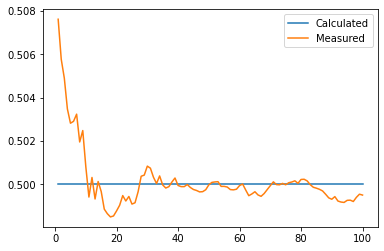

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

B=1000
N=100
nn=np.arange(1,N+1)

EX=np.empty(100)
VX=np.empty(100)


X_n=np.cumsum(np.random.uniform(low=0,high=1,size=(B,N)),axis=1)/nn
EX=X_n.mean(axis=0)

print('X_n shape:', X_n.shape)
print('EX shape:', EX.shape)
print('nn shape:', nn.shape)

plt.plot(nn,0.5*np.ones(100),label='Calculated')
plt.plot(nn,EX,label='Measured')
plt.legend(loc='upper right')

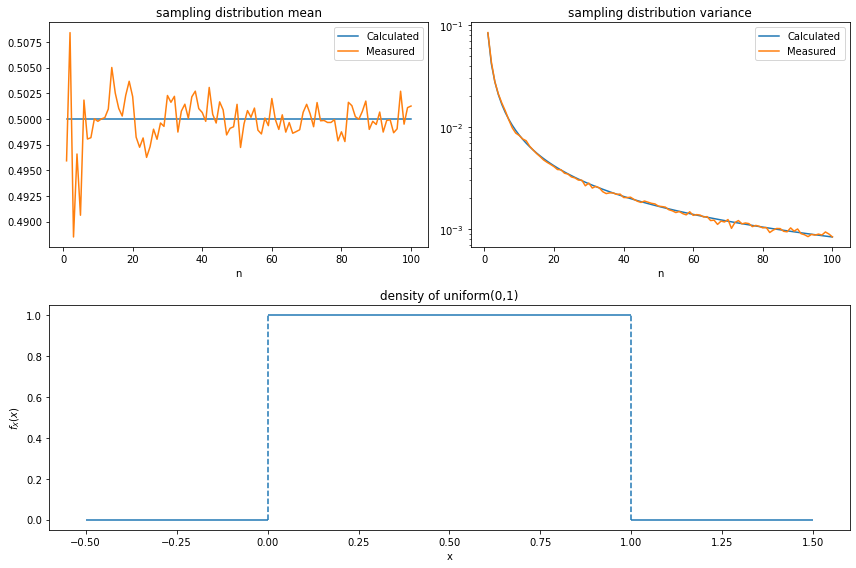

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))

ax=plt.subplot(212)
ax.hlines((0,1,0),xmin=(-0.5,0,1),xmax=(0,1,1.5),color='C0')
ax.vlines([0,1],ymin=0,ymax=1,color='C0',linestyle='dashed')
ax.set_xlabel('x')
ax.set_ylabel('$f_X(x)$')
ax.set_title('density of uniform(0,1)')



ax=plt.subplot(221)
ax.plot(nn,0.5*np.ones(100),label='Calculated')
ax.plot(nn,EX,label='Measured')
ax.set_xlabel('n')
ax.set_ylabel=(r'$\mathbb{E}(\overline{X}_n)$')
ax.set_title('sampling distribution mean')
ax.legend(loc='upper right')

ax=plt.subplot(222)
ax.plot(nn,1/(12*nn),label='Calculated')
ax.plot(nn,VX,label='Measured')
ax.set_xlabel('n')
ax.set_yscale('log')
ax.set_ylabel=(r'$\mathbb{V}(\overline{X}_n)$')
ax.set_title('sampling distribution variance')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()